Importing Dependencies

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

Data Collection

In [32]:
wine_dataset = pd.read_csv('dataset.csv')

In [33]:
wine_dataset.shape

(1599, 12)

In [34]:
wine_dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [35]:
wine_dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Data Analysis & Visualization

In [36]:
# statistical measures of dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


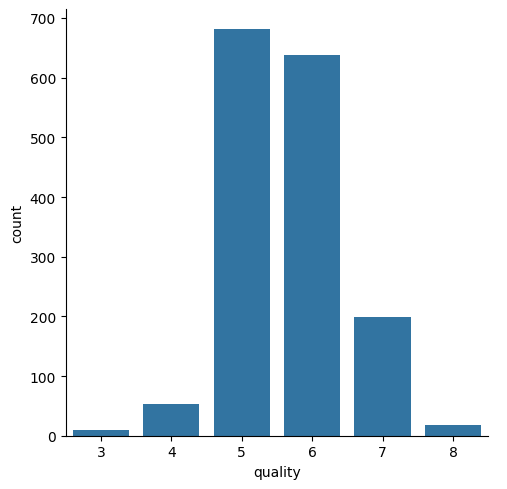

In [37]:
# no. of values for each quality
sns.catplot(x='quality',data = wine_dataset, kind='count')

<Axes: xlabel='quality', ylabel='volatile acidity'>

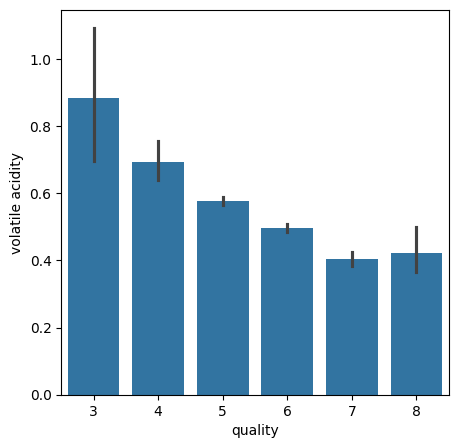

In [38]:
# Volatile Acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='volatile acidity', data = wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

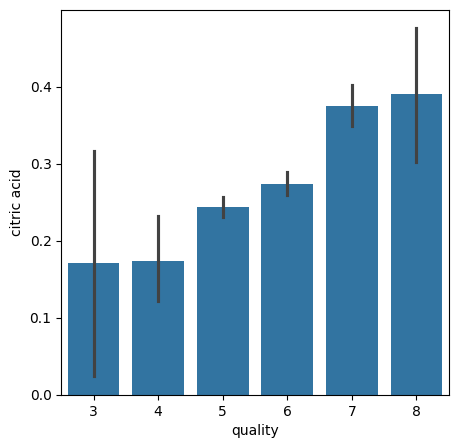

In [39]:
# Citric Acid vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y='citric acid', data = wine_dataset)

Correlation
1. +ve = Directly Proportional
2. -ve = Inversely Proportional

In [40]:
correlation = wine_dataset.corr()

<Axes: >

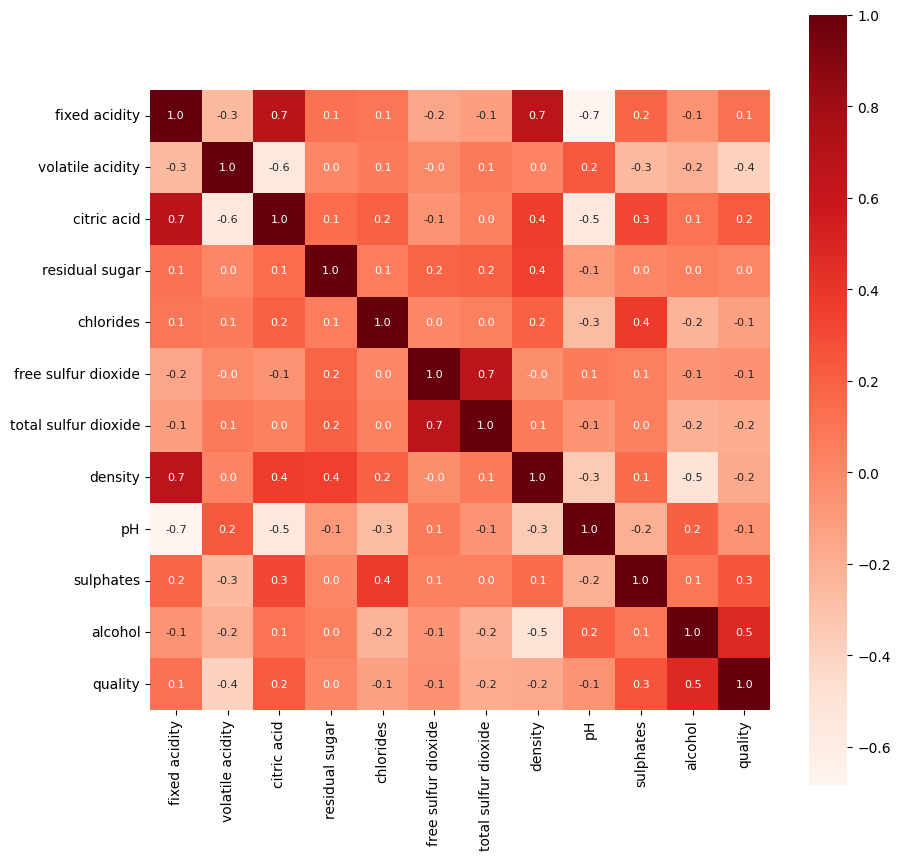

In [41]:
# constructing a heatmap the correlation between the columns
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Reds')

Data Preprocessing

In [42]:
# separating data & label
X = wine_dataset.drop('quality',axis=1)
print(X) 

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

Label Binarization

In [43]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=6 else 0)
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64


Train & Test Split

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [45]:
print(X.shape, X_train.shape, X_test.shape)

(1599, 11) (1279, 11) (320, 11)


Model Training using Random Forest Classifier
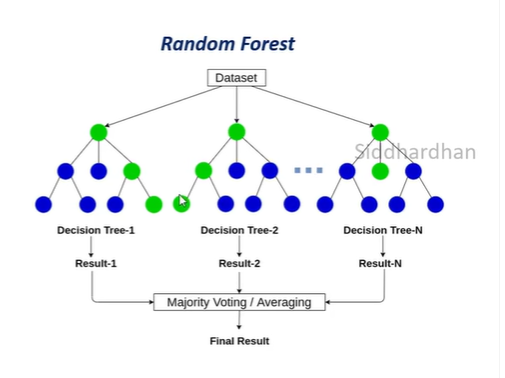

In [46]:
model = RandomForestClassifier()

In [47]:
model.fit(X_train, Y_train)

RandomForestClassifier()

Model Evaluation

In [48]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
print('Test Prediction: ',X_test_prediction)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy: ', test_data_accuracy)

Test Prediction:  [1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0
 0 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1
 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1
 1 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 0
 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1
 0 1 1 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 0 0 0 0 1 1 0 0 1
 0 1 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 0 0
 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0]
Accuracy:  0.778125


Building a Predictive System

In [49]:
input_data = (7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0)

#changing input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the data to predict for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[1]


c:\Users\royav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [50]:
if prediction[0] == 1:
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')

Good Quality Wine


In [51]:
input_data = (5.7,1.13,0.09,1.5,0.172,7.0,19.0,0.9940000000000001,3.5,0.48,9.8)

#changing input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the data to predict for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if prediction[0] == 1:
    print('Good Quality Wine')
else:
    print('Bad Quality Wine')


[0]
Bad Quality Wine


c:\Users\royav\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
